img_jason_classes.csv : 원본

img_jason_classes1.csv : 원본csv파일에 공백만 제거

img_jason_classes2.csv : class 5, 6번이 해당 안되는 이미지만 1/2 랜덤 제거

In [10]:
# 라이브러리
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [12]:
print("Pandas 버전:", pd.__version__)
print("NumPy 버전:", np.__version__)

Pandas 버전: 2.1.3
NumPy 버전: 1.24.3


---

---

- train

In [13]:
train = pd.read_csv("img_train.csv")
train

,class,classname,imagename
0,0,face,image_00000899746856
1,1,eye_opened,image_00000899746856
2,1,eye_opened,image_00000899746856
3,1,eye_opened,image_00001656028538
4,0,face,image_00001656028538
...,...,...,...
557996,3,mouth_closed,image_99995818776282
557997,1,eye_opened,image_99995818776282
557998,0,face,image_99995818776282
557999,3,mouth_closed,image_99998734105341


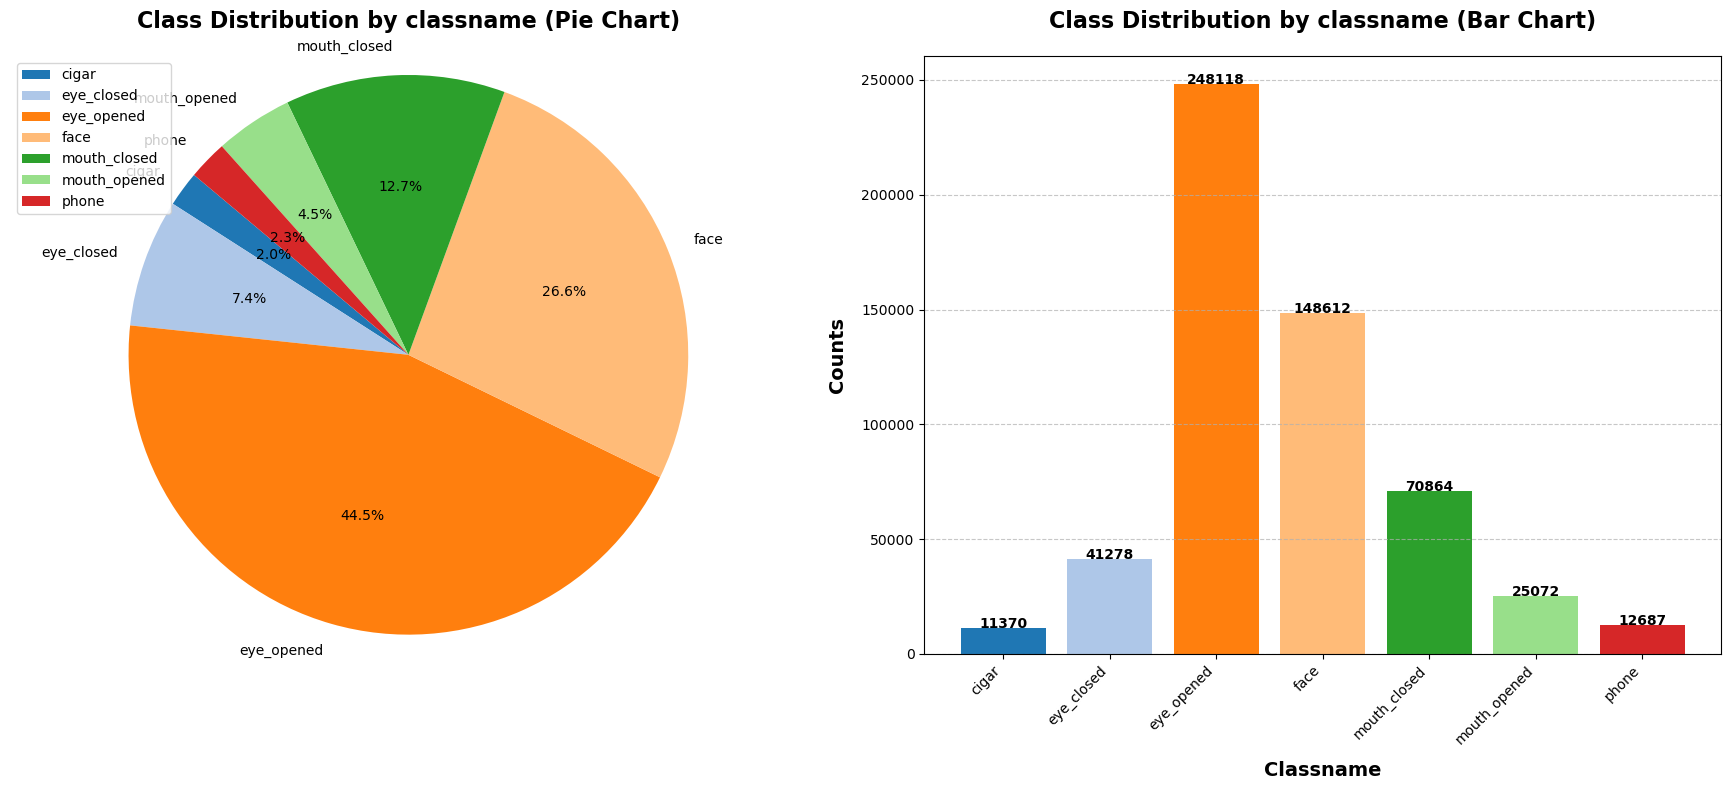

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

# 그래프에 사용할 색상 팔레트 지정
colors = plt.cm.tab20.colors

# 데이터 그룹화 및 빈도 계산
train_re = pd.read_csv("img_train.csv")
grouped = train_re.groupby('classname').size().reset_index(name='counts')

# 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# 파이 차트 그리기
wedges, texts, autotexts = ax1.pie(grouped['counts'], labels=grouped['classname'], autopct='%1.1f%%', startangle=140, colors=colors)
ax1.set_title('Class Distribution by classname (Pie Chart)', fontsize=16, fontweight='bold', pad=20)
ax1.axis('equal')
ax1.legend(loc='best', fontsize='medium')

# 막대 그래프 그리기
bars = ax2.bar(grouped['classname'], grouped['counts'], color=colors)
for bar in bars:
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, str(int(bar.get_height())), ha='center', fontsize=10, fontweight='bold')
ax2.set_title('Class Distribution by classname (Bar Chart)', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Classname', fontsize=14, fontweight='bold', labelpad=10)
ax2.set_ylabel('Counts', fontsize=14, fontweight='bold', labelpad=10)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_xticklabels(grouped['classname'], rotation=45, ha='right')

# 서브플롯 간 간격 조정
plt.tight_layout()
plt.show()

data imbalance가 심해 학습 시 ciger와 phone class를 인식 못함.

imagename 컬럼을 그룹핑 후,

class에 5번 또는 6번이 없는 imagename만 랜덤으로 1/2만큼 삭제

In [4]:
# csv 파일 새롭게 만들기

import pandas as pd
import random

# CSV 파일을 읽어들임
data = pd.read_csv("img_train.csv")

# imagename으로 그룹화하여 클래스 5 또는 6이 없는 이미지 찾기
grouped_data = data.groupby('imagename')
images_to_keep = []

for name, group in grouped_data:
    # 이미지 그룹에서 클래스 5 또는 6이 있는지 확인
    has_5_or_6 = any((group['class'] == 5) | (group['class'] == 6))
    if not has_5_or_6:
        images_to_keep.append(name)

# 이미지 중에서 랜덤으로 절반 선택하여 삭제
random.shuffle(images_to_keep)
images_to_delete = images_to_keep[:len(images_to_keep)//2]

# 삭제할 이미지들을 데이터프레임에서 제거
filtered_data = data[~data['imagename'].isin(images_to_delete)]

# # 필터링된 데이터프레임을 새로운 CSV 파일로 저장
# filtered_data.to_csv("img_train_re.csv", index=False)

# print("새로운 CSV 파일로 저장되었습니다.")

새로운 CSV 파일로 저장되었습니다.


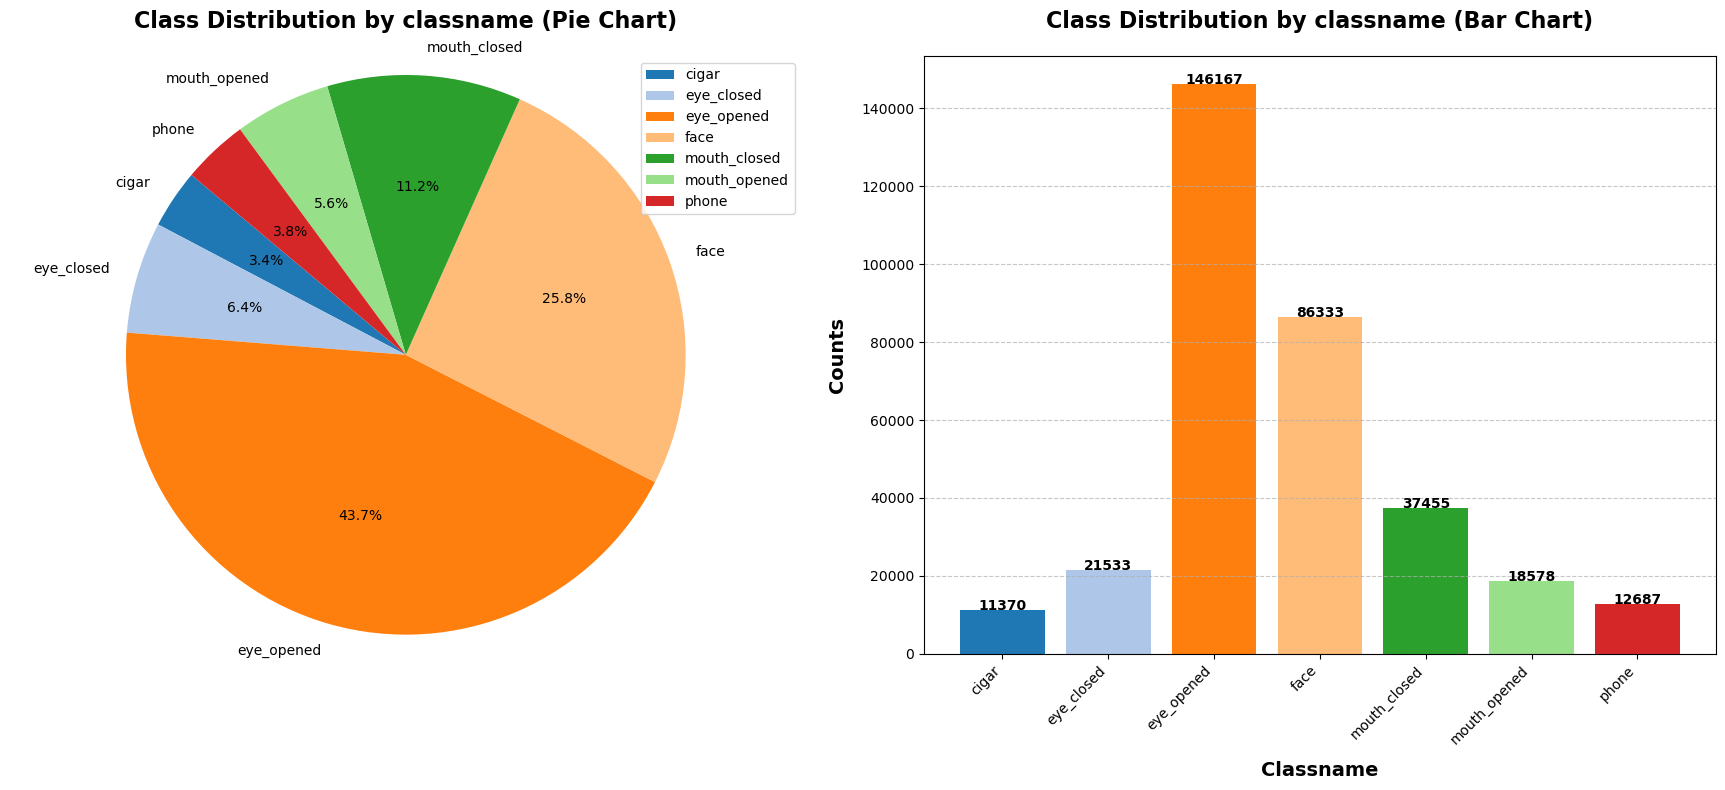

In [5]:
import matplotlib.pyplot as plt

# 그래프에 사용할 색상 팔레트 지정
colors = plt.cm.tab20.colors

# 데이터 그룹화 및 빈도 계산
train_re = pd.read_csv("img_train_re.csv")
grouped = train_re.groupby('classname').size().reset_index(name='counts')

# 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# 파이 차트 그리기
wedges, texts, autotexts = ax1.pie(grouped['counts'], labels=grouped['classname'], autopct='%1.1f%%', startangle=140, colors=colors)
ax1.set_title('Class Distribution by classname (Pie Chart)', fontsize=16, fontweight='bold', pad=20)
ax1.axis('equal')
ax1.legend(loc='best', fontsize='medium')

# 막대 그래프 그리기
bars = ax2.bar(grouped['classname'], grouped['counts'], color=colors)
for bar in bars:
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, str(int(bar.get_height())), ha='center', fontsize=10, fontweight='bold')
ax2.set_title('Class Distribution by classname (Bar Chart)', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Classname', fontsize=14, fontweight='bold', labelpad=10)
ax2.set_ylabel('Counts', fontsize=14, fontweight='bold', labelpad=10)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_xticklabels(grouped['classname'], rotation=45, ha='right')

# 서브플롯 간 간격 조정
plt.tight_layout()
plt.show()

image와 label 복사

In [ ]:
# Image Copy
import pandas as pd
import os
import shutil

# CSV 파일을 읽어들임
data_train = pd.read_csv("img_train_re.csv")
print("Read CSV File")
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
# 이미지 파일이 있는 디렉토리
input_dir = "dataset/train/train_images"
print("input_dir")
# 저장할 디렉토리
output_dir = "train_images"
print("output_dir")

# 이미지 파일 이름 가져오기
image_files = os.listdir(input_dir)
print("-- image_files --")

cnt = 0
# 이미지 파일 이름과 ['imagename'].unique()에 있는 이미지 이름 비교 후, 겹치는 것만 선택하여 저장
for imagename in data_train['imagename'].unique():
    cnt += 1
    if f"{imagename}.jpg" in image_files:
        source_path = os.path.join(input_dir, f"{imagename}.jpg")
        dest_path = os.path.join(output_dir, f"{imagename}.jpg")
        shutil.copyfile(source_path, dest_path)
        print(f"Image Copy, {cnt}")

In [ ]:
# Label Copy
import pandas as pd
import os
import shutil

# CSV 파일을 읽어들임
data_train = pd.read_csv("img_train_re.csv")
print("Read CSV File")
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
# 이미지 파일이 있는 디렉토리
input_dir = "dataset/train/train_labels"
print("input_dir")
# 저장할 디렉토리
output_dir = "train_labels"
print("output_dir")

# 이미지 파일 이름 가져오기
image_files = os.listdir(input_dir)
print("-- image_files --")

cnt = 0
# 이미지 파일 이름과 ['imagename'].unique()에 있는 이미지 이름 비교 후, 겹치는 것만 선택하여 저장
for imagename in data_train['imagename'].unique():
    cnt += 1
    if f"{imagename}.txt" in image_files:
        source_path = os.path.join(input_dir, f"{imagename}.txt")
        dest_path = os.path.join(output_dir, f"{imagename}.txt")
        shutil.copyfile(source_path, dest_path)
        print(f"Text Copy, {cnt}")

image와 label일 일치하는지 "train_result.txt"로 결과 저장해봄

In [ ]:
# File
import os

output_img = "train_images"  # 이미지 파일 폴더 경로
output_txt = "train_labels"  # 텍스트 파일 폴더 경로
output_file = "train_result.txt"  # 결과를 저장할 txt 파일 경로

# 이미지 파일이름과 텍스트 파일 이름 둘 다 뒤에서 4번째 까지 빼고 앞부분만 파일 이름 비교하는 함수
def compare_filenames(directory1, directory2, output_file):
    # 디렉토리 존재 여부 확인
    if not os.path.exists(directory1):
        print(f"디렉토리 '{directory1}'가 존재하지 않습니다.")
        return
    if not os.path.exists(directory2):
        print(f"디렉토리 '{directory2}'가 존재하지 않습니다.")
        return

    # 디렉토리 내의 파일 목록 가져오기
    files1 = sorted(os.listdir(directory1))
    files2 = sorted(os.listdir(directory2))

    # 결과를 저장할 txt 파일 열기
    with open(output_file, 'w') as f:
        for file1, file2 in zip(files1, files2):
            # 파일 이름 앞부분 추출
            img_name = file1[:-4]
            txt_name = file2[:-4]

            # 파일 이름이 일치하는지 여부 확인
            if img_name == txt_name:
                f.write(f"파일 '{file1}'와 '{file2}'의 이름이 일치합니다.\n")
            else:
                f.write(f"파일 '{file1}'와 '{file2}'의 이름이 일치하지 않습니다.\n")

    print(f"비교 결과가 '{output_file}' 파일에 저장되었습니다.")

# 파일 이름 대조 실행
compare_filenames(output_img, output_txt, output_file)

---

---

- val

In [6]:
val = pd.read_csv("img_val.csv")
val

,class,classname,imagename
0,1,eye_opened,image_76001579166439
1,1,eye_opened,image_76001579166439
2,0,face,image_76001579166439
3,4,mouth_opened,image_76003387585759
4,1,eye_opened,image_76003387585759
...,...,...,...
134404,3,mouth_closed,image_99995818776282
134405,1,eye_opened,image_99995818776282
134406,0,face,image_99995818776282
134407,3,mouth_closed,image_99998734105341


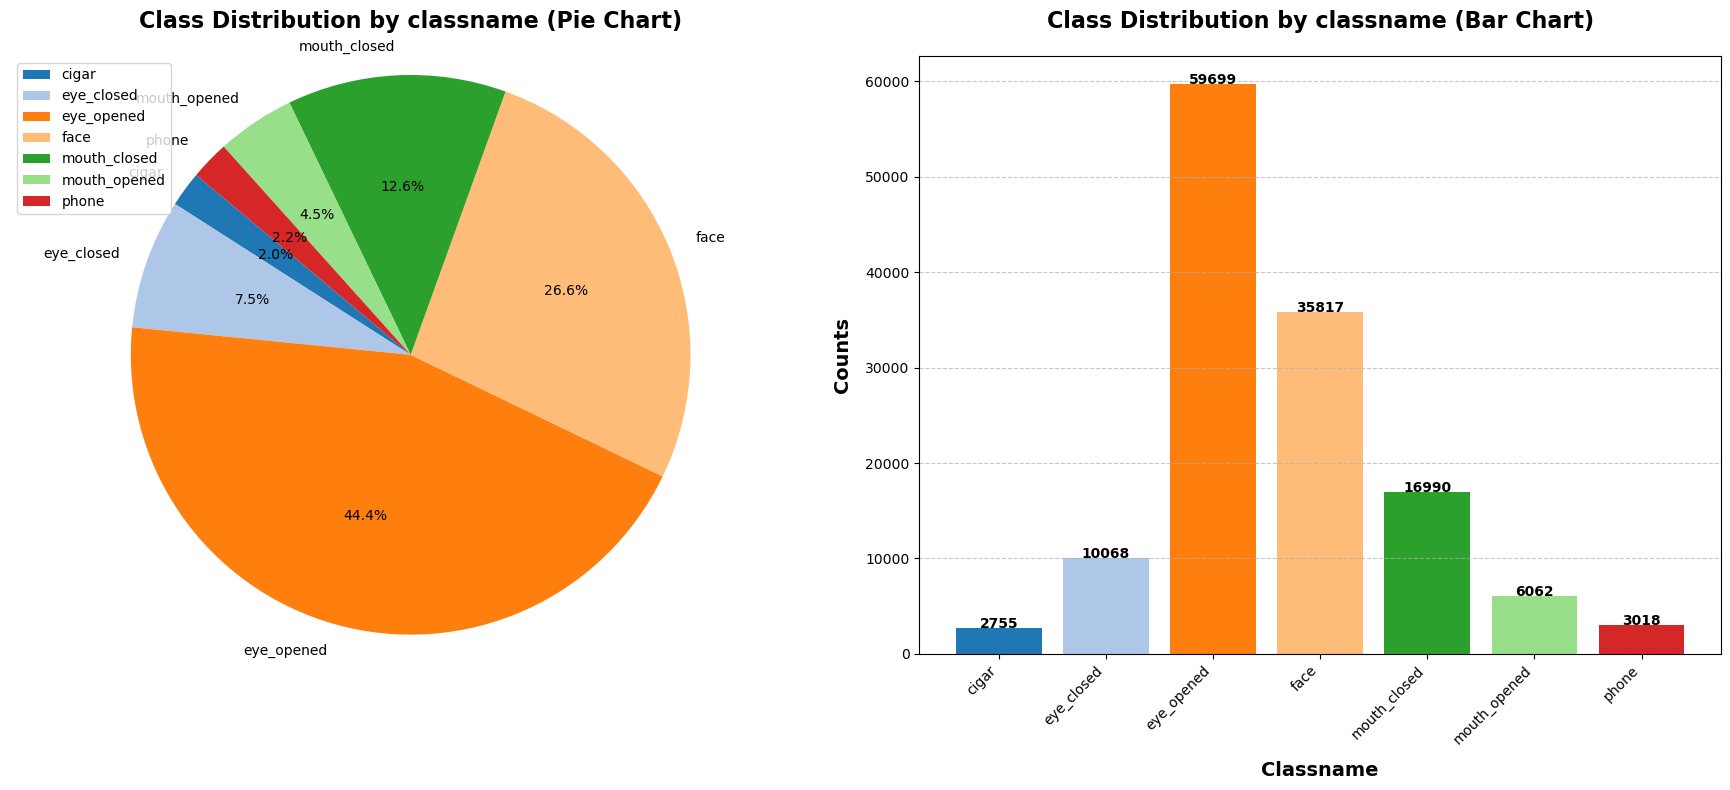

In [7]:
import matplotlib.pyplot as plt

# 그래프에 사용할 색상 팔레트 지정
colors = plt.cm.tab20.colors

# 데이터 그룹화 및 빈도 계산
grouped = val.groupby('classname').size().reset_index(name='counts')

# 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# 파이 차트 그리기
wedges, texts, autotexts = ax1.pie(grouped['counts'], labels=grouped['classname'], autopct='%1.1f%%', startangle=140, colors=colors)
ax1.set_title('Class Distribution by classname (Pie Chart)', fontsize=16, fontweight='bold', pad=20)
ax1.axis('equal')
ax1.legend(loc='best', fontsize='medium')

# 막대 그래프 그리기
bars = ax2.bar(grouped['classname'], grouped['counts'], color=colors)
for bar in bars:
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, str(int(bar.get_height())), ha='center', fontsize=10, fontweight='bold')
ax2.set_title('Class Distribution by classname (Bar Chart)', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Classname', fontsize=14, fontweight='bold', labelpad=10)
ax2.set_ylabel('Counts', fontsize=14, fontweight='bold', labelpad=10)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_xticklabels(grouped['classname'], rotation=45, ha='right')

# 서브플롯 간 간격 조정
plt.tight_layout()
plt.show()

val 데이터도 train과 똑같이 data imbalance가 심해 학습 시 ciger와 phone class를 인식 못함.

imagename 컬럼을 그룹핑 후,

class에 5번 또는 6번이 없는 imagename만 랜덤으로 1/2만큼 삭제

In [9]:
# csv 파일 새롭게 만들기

import pandas as pd
import random

# CSV 파일을 읽어들임
data = pd.read_csv("img_val.csv")

# imagename으로 그룹화하여 클래스 5 또는 6이 없는 이미지 찾기
grouped_data = data.groupby('imagename')
images_to_keep = []

for name, group in grouped_data:
    # 이미지 그룹에서 클래스 5 또는 6이 있는지 확인
    has_5_or_6 = any((group['class'] == 5) | (group['class'] == 6))
    if not has_5_or_6:
        images_to_keep.append(name)

# 이미지 중에서 랜덤으로 절반 선택하여 삭제
random.shuffle(images_to_keep)
images_to_delete = images_to_keep[:len(images_to_keep)//2]

# 삭제할 이미지들을 데이터프레임에서 제거
filtered_data = data[~data['imagename'].isin(images_to_delete)]

# # 필터링된 데이터프레임을 새로운 CSV 파일로 저장
# filtered_data.to_csv("img_val_re.csv", index=False)

# print("새로운 CSV 파일로 저장되었습니다.")

새로운 CSV 파일로 저장되었습니다.


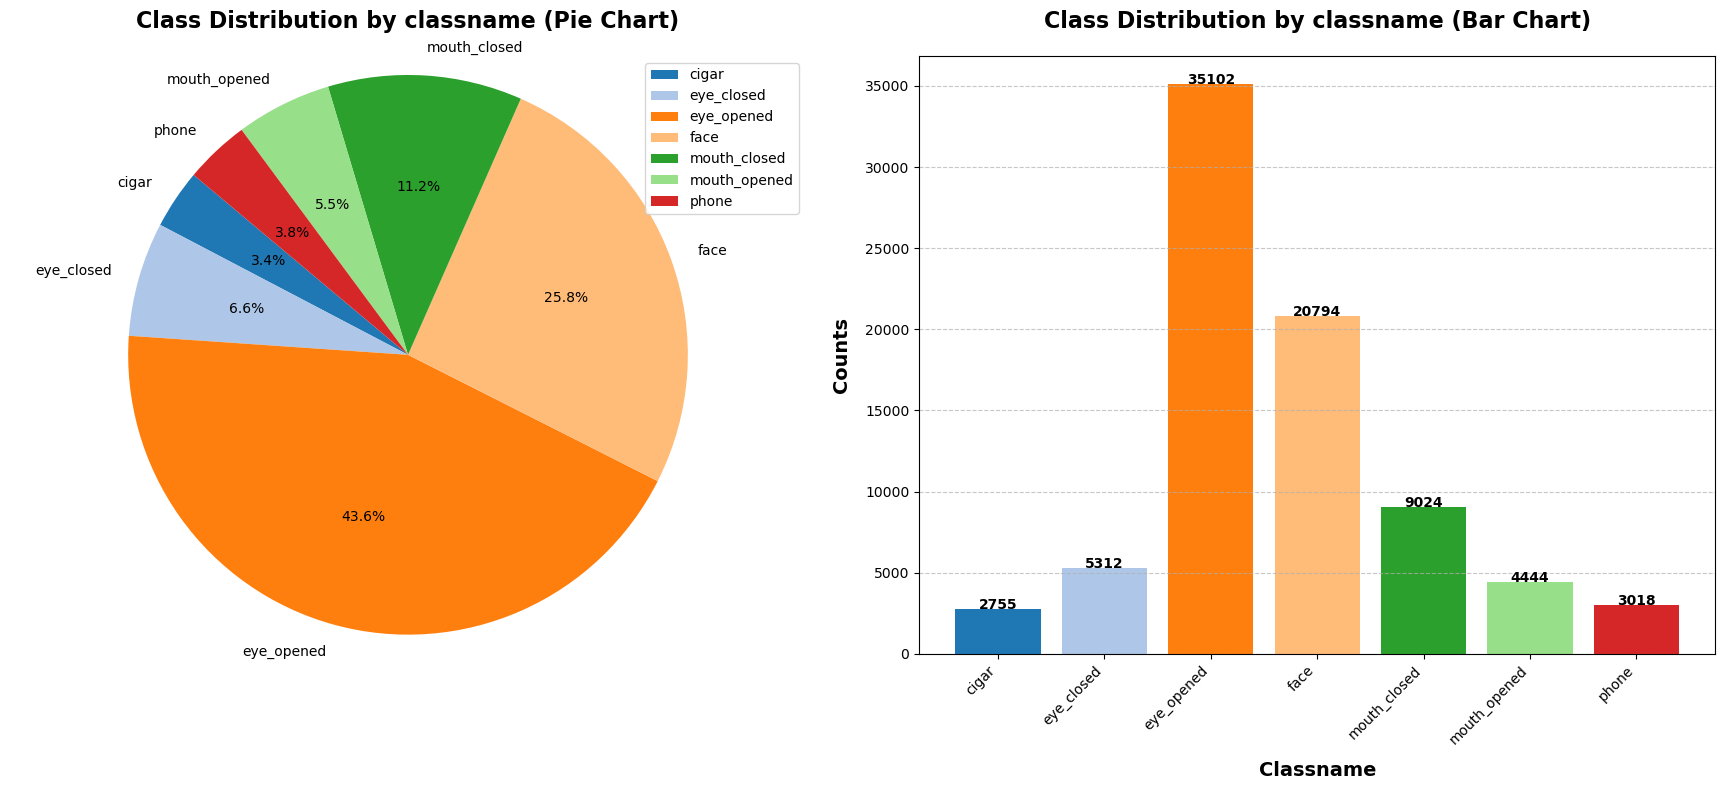

In [8]:
import matplotlib.pyplot as plt

# 그래프에 사용할 색상 팔레트 지정
colors = plt.cm.tab20.colors

# 데이터 그룹화 및 빈도 계산
val_re = pd.read_csv("img_val_re.csv")
grouped = val_re.groupby('classname').size().reset_index(name='counts')

# 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# 파이 차트 그리기
wedges, texts, autotexts = ax1.pie(grouped['counts'], labels=grouped['classname'], autopct='%1.1f%%', startangle=140, colors=colors)
ax1.set_title('Class Distribution by classname (Pie Chart)', fontsize=16, fontweight='bold', pad=20)
ax1.axis('equal')
ax1.legend(loc='best', fontsize='medium')

# 막대 그래프 그리기
bars = ax2.bar(grouped['classname'], grouped['counts'], color=colors)
for bar in bars:
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, str(int(bar.get_height())), ha='center', fontsize=10, fontweight='bold')
ax2.set_title('Class Distribution by classname (Bar Chart)', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Classname', fontsize=14, fontweight='bold', labelpad=10)
ax2.set_ylabel('Counts', fontsize=14, fontweight='bold', labelpad=10)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_xticklabels(grouped['classname'], rotation=45, ha='right')

# 서브플롯 간 간격 조정
plt.tight_layout()
plt.show()

모델에 돌려봤을 때 cigar와 phone이 제대로 인식을 못해 비어있는 텐서로 나와 에러가 남

한 번 더 class에 5번 또는 6번이 없는 imagename만 랜덤으로 1/2만큼 삭제

In [12]:
# csv 파일 새롭게 만들기

import pandas as pd
import random

# CSV 파일을 읽어들임
data = pd.read_csv("img_val_re.csv")

# imagename으로 그룹화하여 클래스 5 또는 6이 없는 이미지 찾기
grouped_data = data.groupby('imagename')
images_to_keep = []

for name, group in grouped_data:
    # 이미지 그룹에서 클래스 5 또는 6이 있는지 확인
    has_5_or_6 = any((group['class'] == 5) | (group['class'] == 6))
    if not has_5_or_6:
        images_to_keep.append(name)

# 이미지 중에서 랜덤으로 절반 선택하여 삭제
random.shuffle(images_to_keep)
images_to_delete = images_to_keep[:len(images_to_keep)//2]

# 삭제할 이미지들을 데이터프레임에서 제거
filtered_data = data[~data['imagename'].isin(images_to_delete)]

# # 필터링된 데이터프레임을 새로운 CSV 파일로 저장
# filtered_data.to_csv("img_val_re2.csv", index=False)

# print("새로운 CSV 파일로 저장되었습니다.")

새로운 CSV 파일로 저장되었습니다.


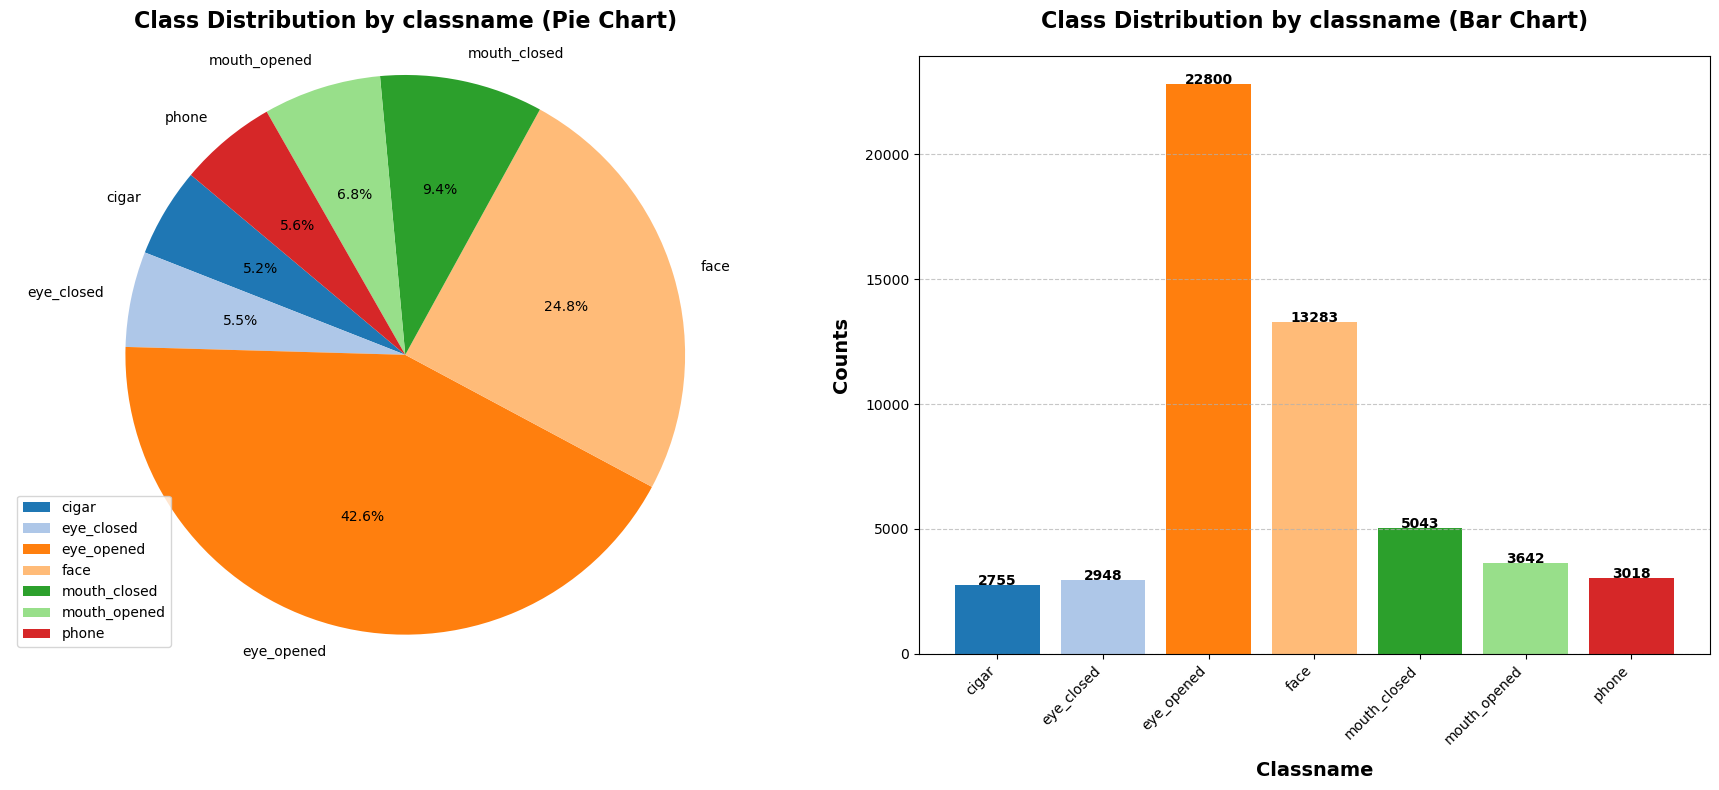

In [9]:
import matplotlib.pyplot as plt

# 그래프에 사용할 색상 팔레트 지정
colors = plt.cm.tab20.colors

# 데이터 그룹화 및 빈도 계산
val_re = pd.read_csv("img_val_re2.csv")
grouped = val_re.groupby('classname').size().reset_index(name='counts')

# 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# 파이 차트 그리기
wedges, texts, autotexts = ax1.pie(grouped['counts'], labels=grouped['classname'], autopct='%1.1f%%', startangle=140, colors=colors)
ax1.set_title('Class Distribution by classname (Pie Chart)', fontsize=16, fontweight='bold', pad=20)
ax1.axis('equal')
ax1.legend(loc='best', fontsize='medium')

# 막대 그래프 그리기
bars = ax2.bar(grouped['classname'], grouped['counts'], color=colors)
for bar in bars:
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, str(int(bar.get_height())), ha='center', fontsize=10, fontweight='bold')
ax2.set_title('Class Distribution by classname (Bar Chart)', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Classname', fontsize=14, fontweight='bold', labelpad=10)
ax2.set_ylabel('Counts', fontsize=14, fontweight='bold', labelpad=10)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_xticklabels(grouped['classname'], rotation=45, ha='right')

# 서브플롯 간 간격 조정
plt.tight_layout()
plt.show()

image와 label 복사

In [ ]:
# Image Copy
import pandas as pd
import os
import shutil

# CSV 파일을 읽어들임
data_val = pd.read_csv("img_val_re2.csv")
print("Read CSV File")
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
# 이미지 파일이 있는 디렉토리
input_dir = "dataset/val/val_images"
print("input_dir")
# 저장할 디렉토리
output_dir = "val_images"
print("output_dir")

# 이미지 파일 이름 가져오기
image_files = os.listdir(input_dir)
print("-- image_files --")

cnt = 0
# 이미지 파일 이름과 ['imagename'].unique()에 있는 이미지 이름 비교 후, 겹치는 것만 선택하여 저장
for imagename in data_val['imagename'].unique():
    cnt += 1
    if f"{imagename}.jpg" in image_files:
        source_path = os.path.join(input_dir, f"{imagename}.jpg")
        dest_path = os.path.join(output_dir, f"{imagename}.jpg")
        shutil.copyfile(source_path, dest_path)
        print(f"Image Copy, {cnt}")

In [ ]:
# Label Copy
import pandas as pd
import os
import shutil

# CSV 파일을 읽어들임
data_val = pd.read_csv("img_val_re2.csv")
print("Read CSV File")
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
# 이미지 파일이 있는 디렉토리
input_dir = "dataset/val/val_labels"
print("input_dir")
# 저장할 디렉토리
output_dir = "val_labels"
print("output_dir")

# 이미지 파일 이름 가져오기
image_files = os.listdir(input_dir)
print("-- image_files --")

cnt = 0
# 이미지 파일 이름과 ['imagename'].unique()에 있는 이미지 이름 비교 후, 겹치는 것만 선택하여 저장
for imagename in data_val['imagename'].unique():
    cnt += 1
    if f"{imagename}.txt" in image_files:
        source_path = os.path.join(input_dir, f"{imagename}.txt")
        dest_path = os.path.join(output_dir, f"{imagename}.txt")
        shutil.copyfile(source_path, dest_path)
        print(f"Text Copy, {cnt}")

image와 label일 일치하는지 "val_result.txt"로 결과 저장해봄

In [ ]:
# File
import os

output_img = "val_images"  # 이미지 파일 폴더 경로
output_txt = "val_labels"  # 텍스트 파일 폴더 경로
output_file = "val_result.txt"  # 결과를 저장할 txt 파일 경로

# 이미지 파일이름과 텍스트 파일 이름 둘 다 뒤에서 4번째 까지 빼고 앞부분만 파일 이름 비교하는 함수
def compare_filenames(directory1, directory2, output_file):
    # 디렉토리 존재 여부 확인
    if not os.path.exists(directory1):
        print(f"디렉토리 '{directory1}'가 존재하지 않습니다.")
        return
    if not os.path.exists(directory2):
        print(f"디렉토리 '{directory2}'가 존재하지 않습니다.")
        return

    # 디렉토리 내의 파일 목록 가져오기
    files1 = sorted(os.listdir(directory1))
    files2 = sorted(os.listdir(directory2))

    # 결과를 저장할 txt 파일 열기
    with open(output_file, 'w') as f:
        for file1, file2 in zip(files1, files2):
            # 파일 이름 앞부분 추출
            img_name = file1[:-4]
            txt_name = file2[:-4]

            # 파일 이름이 일치하는지 여부 확인
            if img_name == txt_name:
                f.write(f"파일 '{file1}'와 '{file2}'의 이름이 일치합니다.\n")
            else:
                f.write(f"파일 '{file1}'와 '{file2}'의 이름이 일치하지 않습니다.\n")

    print(f"비교 결과가 '{output_file}' 파일에 저장되었습니다.")

# 파일 이름 대조 실행
compare_filenames(output_img, output_txt, output_file)